In [32]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\sss\anaconda3\lib\site-packages (0.24.1)
Note: you may need to restart the kernel to use updated packages.


In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('communities.csv')

In [34]:
columns = list(df)
col = columns[5:-1]
df = df.dropna(axis='columns')

In [35]:
#print(df)

In [36]:
df['HighCrime'] = (df['ViolentCrimesPerPop'] > 0.1)


In [37]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Target'] = le.fit_transform(df.HighCrime)


In [38]:
features = list(df)

#This consists of all the features in a data frame

features.remove("ViolentCrimesPerPop")
#As we have a new column ‘High crime’ based on this feature, 
#we remove this column for our model

features.remove("Target")
features.remove("HighCrime")
#Target and highcrime features are not included in the remaining features’ list 

feat = features[5:]
#first five attributes are mentioned to be non-predictive in the description of the data set


#Decision Tree Classification

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
y = df ['Target']
x = df[feat]
X_train, X_test, y_train, y_test = train_test_split(x , y)
print(X_train)
print(X_test)

dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(X_train, y_train)

      racepctblack  racePctWhite  racePctAsian  racePctHisp  agePct12t21  \
1051          0.42          0.65          0.05         0.02         0.49   
1013          0.02          0.95          0.15         0.01         0.48   
737           0.01          0.96          0.12         0.01         1.00   
1647          0.53          0.47          0.05         0.18         0.47   
275           0.34          0.37          0.75         0.44         0.41   
1196          1.00          0.00          0.04         0.03         0.40   
558           0.06          0.80          0.45         0.14         0.39   
93            0.01          0.94          0.14         0.04         0.47   
619           0.04          0.64          1.00         0.10         0.38   
345           0.01          0.92          0.14         0.02         0.40   
1667          0.01          0.95          0.20         0.01         0.43   
416           0.00          0.99          0.03         0.02         0.42   
988         

DecisionTreeClassifier(criterion='entropy')

In [40]:
y_pred = dt.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_dt = accuracy_score(y_test,y_pred)*100

print('Accuracy: ', accuracy_dt)
precision_dt = precision_score(y_test,y_pred)*100 
print(precision_dt)
recall_dt = recall_score(y_test,y_pred)*100
print(recall_dt)
f1= 2*(precision_dt * recall_dt) / (precision_dt+recall_dt)
print(f1)

[[125  56]
 [ 73 245]]
Accuracy:  74.14829659318637
81.3953488372093
77.04402515723271
79.15993537964458


In [42]:
#k fold cross validation scores

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
k = 10
kf = KFold(n_splits=k, random_state=None)
model = DecisionTreeClassifier(criterion = 'entropy')
 
acc_score = []
pre_score = []
rec_score = []
f1_sc =[]

 
for train_index , test_index in kf.split(x):
    X_train , X_test = x.iloc[train_index,:],x.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
    pre = precision_score(pred_values , y_test)
    pre_score.append(pre)
    rec = recall_score(pred_values , y_test)
    rec_score.append(rec)
    f1sc= f1_score(pred_values , y_test)
    f1_sc.append(f1sc)

avg_acc_score = sum(acc_score)/k
avg_pre_score = sum(pre_score)/k
avg_rec_score = sum(rec_score)/k
avg_f1_score = sum(f1_sc)/k

print('Avg accuracy : {}'.format(avg_acc_score))
print('Avg precision : {}'.format(avg_pre_score))
print('Avg recall : {}'.format(avg_rec_score))
print('Avg f1 score : {}'.format(avg_f1_score))


Avg accuracy : 0.7803316582914573
Avg precision : 0.8154049120426585
Avg recall : 0.831238928323233
Avg f1 score : 0.8229976039360271


The top 10 Feature importances are:

PctKids2Par, Score: 0.298
racePctHisp, Score: 0.065
racePctWhite, Score: 0.06
PctFam2Par, Score: 0.037
PctBornSameState, Score: 0.026
blackPerCap, Score: 0.024
PctVacantBoarded, Score: 0.022
PctPersDenseHous, Score: 0.02
racepctblack, Score: 0.018
AsianPerCap, Score: 0.016


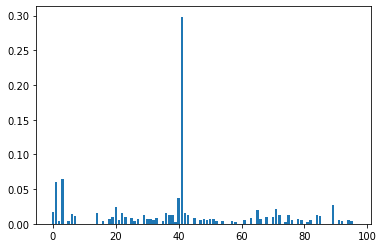

In [43]:
from matplotlib import pyplot
importance = dt.feature_importances_

imp_list = []
for i,v in enumerate(importance):
    imp_list.append((i, v))
sorted_list = sorted(imp_list, key=lambda x: x[1], reverse=True)
print('The top 10 Feature importances are:' '\n')

for f, i in sorted_list[:10]:
    print(f'{X_train.columns[f]}, Score: {round(i, 3)}')



pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


#Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
y = df ['Target']
x = df[feat]
X_train, X_test, y_train, y_test = train_test_split(x , y)
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 1)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [45]:
y_predrf = classifier.predict(X_test)


In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_predrf)
print(cm)
acc = accuracy_score(y_test, y_predrf) * 100
print(acc)
precision_dt = precision_score(y_test,y_predrf)*100 
print(precision_dt)
recall_dt = recall_score(y_test,y_predrf)*100
print(recall_dt)

[[150  42]
 [ 34 273]]
84.76953907815631
86.66666666666667
88.92508143322475


In [48]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

from sklearn import model_selection
from sklearn.model_selection import KFold
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

kfold = model_selection.KFold(n_splits=10)
model=RandomForestClassifier(n_estimators=50) 

results = model_selection.cross_validate(estimator=model,
                                          X=x,
                                          y=y,
                                          cv=kfold,
                                          scoring=scoring)
print(results['test_accuracy'].mean())
print(results['test_precision'].mean())
print(results['test_recall'].mean())
print(results['test_f1_score'].mean())

0.8294773869346732
0.8704868981990908
0.8552549387656692
0.8624888964607018


The top 10 Feature importances are:

PctKids2Par, Score: 0.068
FemalePctDiv, Score: 0.047
PctIlleg, Score: 0.042
racePctWhite, Score: 0.034
PctPersDenseHous, Score: 0.031
PctFam2Par, Score: 0.03
TotalPctDiv, Score: 0.029
NumIlleg, Score: 0.026
PctYoungKids2Par, Score: 0.025
MalePctDivorce, Score: 0.025


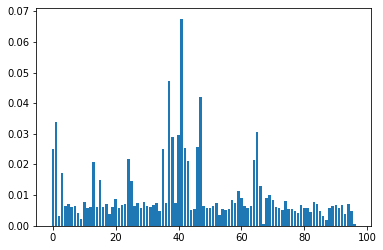

In [49]:
from matplotlib import pyplot

importance = classifier.feature_importances_


imp_list = []
for i,v in enumerate(importance):
    imp_list.append((i, v))
sorted_list = sorted(imp_list, key=lambda x: x[1], reverse=True)
print('The top 10 Feature importances are:' '\n')

for f, i in sorted_list[:10]:
    print(f'{X_train.columns[f]}, Score: {round(i, 3)}')
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

#Naive Bayes Classification

In [50]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
y = df ['Target']
x = df[feat]
X_train, X_test, y_train, y_test = train_test_split(x , y)

clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train) 

y_prednb = clf_gnb.predict(X_test)

In [51]:
from sklearn.metrics import confusion_matrix
cmnb = confusion_matrix(y_test, y_prednb)
print(cmnb)

[[165  18]
 [ 88 228]]


In [52]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn import model_selection
from sklearn.model_selection import KFold
scoring = {'accuracy' : make_scorer(accuracy_score), 'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 'f1_score' : make_scorer(f1_score)}

kfold = model_selection.KFold(n_splits=10)

results = model_selection.cross_validate(estimator=clf_gnb,X=X_test,y=y_test,cv=kfold,scoring=scoring)
print(np.mean(results['test_accuracy']))
print(np.mean(results['test_precision']))
print(np.mean(results['test_recall']))
print(np.mean(results['test_f1_score']))

0.7876326530612245
0.8985960258737029
0.7460430629426409
0.8125027669311258


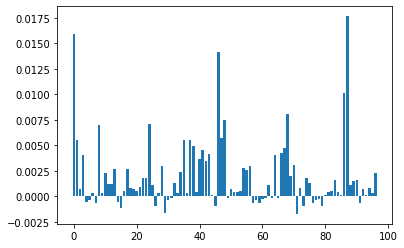

Feature ranking:
1. NumStreet (0.017659)
2. racepctblack (0.015920)
3. NumIlleg (0.014181)
4. NumInShelters (0.010167)
5. HousVacant (0.008027)
6. NumImmig (0.007492)
7. NumUnderPov (0.007090)
8. numbUrban (0.006957)
9. PctIlleg (0.005753)
10. racePctWhite (0.005485)
11. MalePctDivorce (0.005485)
12. FemalePctDiv (0.005485)
13. TotalPctDiv (0.004950)
14. MedNumBR (0.004682)
15. PctKids2Par (0.004548)
16. PctHousLess3BR (0.004281)
17. PctTeen2Par (0.004147)
18. PctPersOwnOccup (0.004013)
19. racePctHisp (0.004013)
20. PctFam2Par (0.003612)
21. PctYoungKids2Par (0.003478)
22. PctHousOwnOcc (0.003077)
23. PctBSorMore (0.002943)
24. PctRecImmig10 (0.002943)
25. PctRecImmig5 (0.002809)
26. pctWInvInc (0.002676)
27. medFamInc (0.002676)
28. PctRecImmig8 (0.002542)
29. PctOccupMgmtProf (0.002408)
30. LemasPctOfficDrugUn (0.002274)
31. medIncome (0.002274)
32. PctHousOccup (0.002007)
33. PctHousNoPhone (0.001739)
34. HispPerCap (0.001739)
35. AsianPerCap (0.001739)
36. PctSameHouse85 (0.001605

In [53]:
from sklearn.inspection import permutation_importance

imps = permutation_importance(clf_gnb, X_train, y_train)
importances = imps.importances_mean

pyplot.bar([x for x in range(len(importances))], importances)
pyplot.show()
std = imps.importances_std
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X_test.shape[1]):
    print("%d. %s (%f)" % (f + 1, feat[indices[f]], importances[indices[f]]))



#Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
y = df ['Target']
x = df[feat]
X_train, X_test, y_train, y_test = train_test_split(x , y)

linreg = LinearRegression()
linreg.fit(X_train,y_train)
from sklearn.metrics import mean_squared_error

In [55]:
y_predlr = linreg.predict(X_test)

In [56]:
from sklearn.model_selection import cross_val_score

mse=cross_val_score(linreg,
X_train,y_train,cv=10,scoring='neg_mean_squared_error')

print(abs(mse.mean()))

rsq = linreg.score(X_train, y_train)
print(rsq)


0.1335197047267635
0.5076382580086761


In [57]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test,y_predlr)
print(mse)


0.1310919485883113


In [58]:
pd.options.display.max_rows = 999
lst = linreg.coef_
data_tuples = list(zip(feat,lst))
dflin = pd.DataFrame(data_tuples, columns=['ftrs', 'imp'])
dflin.imp =dflin.imp
#print(dflin)
dflin = dflin.sort_values(by='imp', ascending=False)
print(dflin)

                     ftrs       imp
61       PersPerOccupHous  1.181412
17              medFamInc  0.879567
55           PctRecImmig8  0.762140
54           PctRecImmig5  0.759424
81              RentHighQ  0.714296
8               numbUrban  0.709196
7              agePct65up  0.698679
34       PctOccupMgmtProf  0.659900
70          PctHousOwnOcc  0.552372
77           OwnOccMedVal  0.479914
3             racePctHisp  0.410308
52          PctImmigRec10  0.380291
88         PctForeignBorn  0.372944
37           FemalePctDiv  0.339081
43            PctTeen2Par  0.327670
30              PctEmploy  0.317926
35         MalePctDivorce  0.272513
40             PctFam2Par  0.226619
49         PctImmigRecent  0.219103
66         PctHousLess3BR  0.210565
19            whitePerCap  0.187557
89       PctBornSameState  0.144824
86          NumInShelters  0.133782
2            racePctAsian  0.127887
83      MedRentPctHousInc  0.127260
45             PctWorkMom  0.126199
18              perCapInc  0

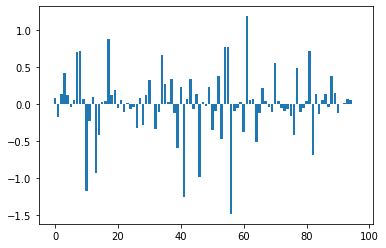

In [59]:
importance = linreg.coef_
indices = np.argsort(importance)[::-1]

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()